# Linear Regression Example

In [4]:
import tensorflow as tf
import numpy as np

In [6]:
# Parameters
learning_rate = 0.01
training_steps = 1000
display_step = 50

In [7]:
# Training Data.
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
              2.827,3.465,1.65,2.904,2.42,2.94,1.3])

In [8]:
# Weight and Bias, initialized randomly
W = tf.Variable(np.random.randn(), name='weight')
b = tf.Variable(np.random.rand(), name='bias')

In [9]:
# Linear regression (Wx + b)
def linear_regression(x):
    return W * x + b

In [10]:
# Mean square error
def mean_square(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

In [11]:
# Stochastic Gradient Descent Optimizer
optimizer = tf.optimizers.SGD(learning_rate)

In [12]:
# Optiomization process
def run_optimization():
    # Wrap computation inside a GradientTape for automatic differentation
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        
    # compute gradient
    gradients = g.gradient(loss, [W, b])
    
    # Update W and b following gradients
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [13]:
# Run training for the given number of steps
for step in range(1, training_steps + 1):
    # Run the optimization to update W and b values
    run_optimization()
    if step % display_step == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print("step: {}, loss: {}, W: {}, b: {}".format(
                step, loss, W.numpy(), b.numpy()))

step: 50, loss: 0.15457437932491302, W: 0.26236727833747864, b: 0.7227136492729187
step: 100, loss: 0.15441973507404327, W: 0.2611391246318817, b: 0.7314208149909973
step: 150, loss: 0.15429849922657013, W: 0.26005151867866516, b: 0.7391313910484314
step: 200, loss: 0.15420332551002502, W: 0.2590883672237396, b: 0.7459597587585449
step: 250, loss: 0.15412871539592743, W: 0.2582354247570038, b: 0.7520067095756531
step: 300, loss: 0.15407028794288635, W: 0.25748011469841003, b: 0.757361650466919
step: 350, loss: 0.1540243923664093, W: 0.2568112015724182, b: 0.7621037364006042
step: 400, loss: 0.15398840606212616, W: 0.2562188506126404, b: 0.766303300857544
step: 450, loss: 0.153960183262825, W: 0.2556942403316498, b: 0.7700226306915283
step: 500, loss: 0.15393806993961334, W: 0.2552297115325928, b: 0.773315966129303
step: 550, loss: 0.1539207398891449, W: 0.254818320274353, b: 0.7762323617935181
step: 600, loss: 0.15390713512897491, W: 0.2544540762901306, b: 0.7788149118423462
step: 650,

In [14]:
import matplotlib.pyplot as plt

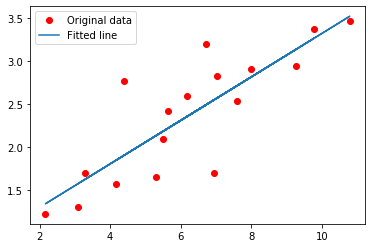

In [15]:
# Graphic display
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, np.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()